<a href="https://colab.research.google.com/github/mssabahi/Deep_Learning/blob/main/01_neural_network_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [133]:
import tensorflow as tf
print(tf.__version__)

2.6.0


# Creating data to view and fit¶


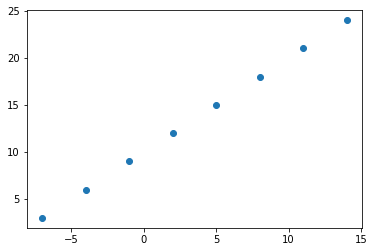

In [134]:
import numpy as np
import matplotlib.pyplot as plt

# Create features
X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])

# Create labels
y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

# Visualize it
plt.scatter(X, y);

# Regression input shapes and output shapes

In [135]:
# Example input and output shapes of a regresson model
house_info = tf.constant(["bedroom", "bathroom", "garage"])
house_price = tf.constant([939700])
house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

# Steps in modelling with TensorFlow¶


1.   Creating a model - piece together the layers of a neural network yourself 
(using the Functional or Sequential API) or import a previously built model (known as transfer learning).

2.   Compiling a model - defining how a models performance should be measured (loss/metrics) as well as defining how it should improve (optimizer).

3.  Fitting a model - letting the model try to find patterns in the data (how does X get to y).




In [136]:
# Set random seed
tf.random.set_seed = 42

# Create a model using the Sequential API
model = tf.keras.Sequential([
  tf.keras.layers.Dense(1)
])

# Compile the model
model.compile(loss=tf.keras.losses.mae, # mae is short for mean absolute error
              optimizer=tf.keras.optimizers.SGD(), # SGD is short for stochastic gradient descent
              metrics=["mae"])

# Fit the model
model.fit(X, y, epochs=5)

Epoch 1/5
1/1 [==============================] - 0s 229ms/step - loss: 17.9530 - mae: 17.9530
Epoch 2/5
1/1 [==============================] - 0s 2ms/step - loss: 17.6718 - mae: 17.6718
Epoch 3/5
1/1 [==============================] - 0s 6ms/step - loss: 17.3905 - mae: 17.3905
Epoch 4/5
1/1 [==============================] - 0s 2ms/step - loss: 17.1093 - mae: 17.1093
Epoch 5/5
1/1 [==============================] - 0s 7ms/step - loss: 16.8280 - mae: 16.8280


In [137]:
# Check out X and y
X, y

(array([-7., -4., -1.,  2.,  5.,  8., 11., 14.]),
 array([ 3.,  6.,  9., 12., 15., 18., 21., 24.]))

In [138]:
# Make a prediction with the model
model.predict([17.0])

array([[-12.347846]], dtype=float32)

In [139]:
# It doesn't go very well... it should've output something close to 27.0.

Before TensorFlow 2.0+, Keras was an API designed to be able to build deep learning models with ease. Since TensorFlow 2.0+, its functionality has been tightly integrated within the TensorFlow library.

# Improving a model
How do you think you'd improve upon our current model?

If you guessed by tweaking some of the things we did above, you'd be correct.

To improve our model, we alter almost every part of the 3 steps we went through before.

1.  Creating a model - here you might want to add more layers, increase the number of hidden units (also called neurons) within each layer, change the activation functions of each layer.
2.  Compiling a model - you might want to choose optimization function or perhaps change the learning rate of the optimization function.
3.  Fitting a model - perhaps you could fit a model for more epochs (leave it training for longer) or on more data (give the model more examples to learn from).


There are many different ways to potentially improve a neural network. Some of the most common include: increasing the number of layers (making the network deeper), increasing the number of hidden units (making the network wider) and changing the learning rate. Because these values are all human-changeable, they're referred to as hyperparameters) and the practice of trying to find the best hyperparameters is referred to as hyperparameter tuning.

In [140]:
# How to build a NN for our data
# Set random seed
tf.random.set_seed = 42

# Create a model (same as above)
model = tf.keras.Sequential([
  tf.keras.layers.Dense(1)
])

# Compile model (same as above)
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

# Fit model (this time we'll train for longer)
model.fit(X, y, epochs=100) # train for 100 epochs not 10

Epoch 1/100
1/1 [==============================] - 0s 222ms/step - loss: 14.6683 - mae: 14.6683
Epoch 2/100
1/1 [==============================] - 0s 3ms/step - loss: 14.5358 - mae: 14.5358
Epoch 3/100
1/1 [==============================] - 0s 4ms/step - loss: 14.4033 - mae: 14.4033
Epoch 4/100
1/1 [==============================] - 0s 3ms/step - loss: 14.2708 - mae: 14.2708
Epoch 5/100
1/1 [==============================] - 0s 3ms/step - loss: 14.1383 - mae: 14.1383
Epoch 6/100
1/1 [==============================] - 0s 3ms/step - loss: 14.0058 - mae: 14.0058
Epoch 7/100
1/1 [==============================] - 0s 7ms/step - loss: 13.8733 - mae: 13.8733
Epoch 8/100
1/1 [==============================] - 0s 4ms/step - loss: 13.7408 - mae: 13.7408
Epoch 9/100
1/1 [==============================] - 0s 5ms/step - loss: 13.6083 - mae: 13.6083
Epoch 10/100
1/1 [==============================] - 0s 5ms/step - loss: 13.4758 - mae: 13.4758
Epoch 11/100
1/1 [==============================] - 0s 10

In [141]:
# Try and predict what y would be if X was 17.0
model.predict([17.0]) # the right answer is 27.0 (y = X + 10)

array([[29.730186]], dtype=float32)

# Evaluating a model¶


In [142]:
# Make a bigger dataset
X = np.arange(-100, 100, 4)
X

array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96])

In [143]:
# Make labels for the dataset (adhering to the same pattern as before)
y = np.arange(-90, 110, 4)
y

array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106])

Since $y=X+10$, we could make the labels like so:

One of the other most common and important steps in a machine learning project is creating a training and test set (and when required, a validation set).

Each set serves a specific purpose:

1.   Training set - the model learns from this data, which is typically 70-80% of the total data available (like the course materials you study during the semester).
2.  Validation set - the model gets tuned on this data, which is typically 10-15% of the total data available (like the practice exam you take before the final exam).
3.  Test set - the model gets evaluated on this data to test what it has learned, it's typically 10-15% of the total data available (like the final exam you take at the end of the semester).

For now, we'll just use a training and test set, this means we'll have a dataset for our model to learn on as well as be evaluated on.# Split data into training/test set¶


In [144]:
# Check how many samples we have
len(X)

50

In [145]:
# Split data into train and test sets
X_train = X[:40] # first 40 examples (80% of data)
y_train = y[:40]

X_test = X[40:] # last 10 examples (20% of data)
y_test = y[40:]

len(X_train), len(X_test)

(40, 10)

# Visualizing the data¶


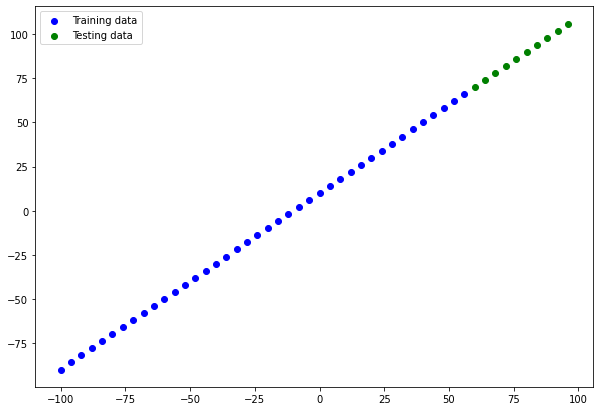

In [146]:
plt.figure(figsize=(10, 7))
# Plot training data in blue
plt.scatter(X_train, y_train, c='b', label='Training data')
# Plot test data in green
plt.scatter(X_test, y_test, c='g', label='Testing data')
# Show the legend
plt.legend();

In [147]:
# Set random seed
tf.random.set_seed = 42

# Create a model (same as above)
model = tf.keras.Sequential([
  tf.keras.layers.Dense(1)
])

# Compile model (same as above)
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

# Fit model (same as above)
#model.fit(X_train, y_train, epochs=100) # commented out on purpose (not fitting it just yet)

In [148]:
# This will work after specifying the input shape
# model.summary()

# '''
# ---------------------------------------------------------------------------
# ValueError                                Traceback (most recent call last)
# <ipython-input-18-d317e2dd1ad4> in <module>()
#       1 # This will work after specifying the input shape
# ----> 2 model.summary()

# /usr/local/lib/python3.7/dist-packages/keras/engine/training.py in summary(self, line_length, positions, print_fn)
#    2519     """
#    2520     if not self.built:
# -> 2521       raise ValueError('This model has not yet been built. '
#    2522                        'Build the model first by calling `build()` or calling '
#    2523                        '`fit()` with some data, or specify '

# ValueError: This model has not yet been built. Build the model first by calling `build()` or calling `fit()` with some data, or specify an `input_shape` argument in the first layer(s) for automatic build.

# '''

The cell above errors because we haven't fit our built our model.

We also haven't told it what input shape it should be expecting.

Remember above, how we discussed the input shape was just one number?

We can let our model know the input shape of our data using the input_shape parameter to the first layer (usually if input_shape isn't defined, Keras tries to figure it out automatically).

In [149]:
# Set random seed
tf.random.set_seed = 42

# Create a model (same as above)
model = tf.keras.Sequential([
  tf.keras.layers.Dense(3, input_shape=[2],name='input_layer')] # define the input_shape to our model; just X
  
)

# Compile model (same as above)
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

In [150]:
# This will work after specifying the input shape
model.summary()

Model: "sequential_23"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (Dense)          (None, 3)                 9         
Total params: 9
Trainable params: 9
Non-trainable params: 0
_________________________________________________________________


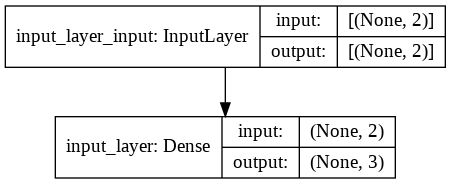

In [151]:
from tensorflow.keras.utils import plot_model
plot_model(model, show_shapes=True)

In [152]:
# Set random seed
tf.random.set_seed = 42

# Create a model (same as above)
model = tf.keras.Sequential([
  tf.keras.layers.Dense(4, input_shape=[3],name='input_layer'), # define the input_shape to our model; just X
  tf.keras.layers.Dense(3, name='output_layer')],'one of many models'
)

# Compile model (same as above)
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

In [153]:
# This will work after specifying the input shape
model.summary()

Model: "one of many models"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (Dense)          (None, 4)                 16        
_________________________________________________________________
output_layer (Dense)         (None, 3)                 15        
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


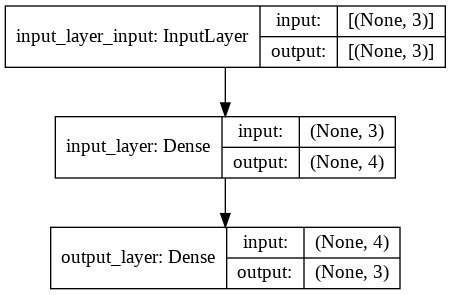

In [154]:
plot_model(model, show_shapes=True)

Calling summary() on our model shows us the layers it contains, the output shape and the number of parameters.

1.  Total params - total number of parameters in the model. X and Y
2.  Trainable parameters - these are the parameters (patterns) the model can update as it trains.
3.  Non-trainable parameters - these parameters aren't updated during training (this is typical when you bring in the already learned patterns from other models during transfer learning).

Model: "Model_01"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (Dense)          (None, 10)                20        
_________________________________________________________________
output_layer (Dense)         (None, 1)                 11        
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


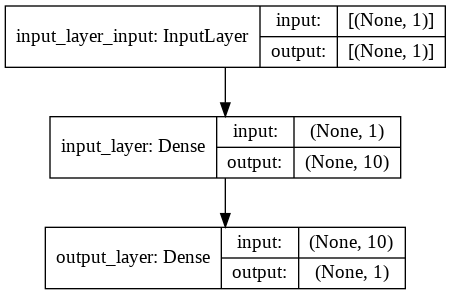

In [155]:
# Set random seed
tf.random.set_seed = 42

# Create a model (same as above)
model = tf.keras.Sequential([
  tf.keras.layers.Dense(10, input_shape=[1],name='input_layer'), # define the input_shape to our model; just X
  tf.keras.layers.Dense(1, name='output_layer')],'Model_01'
)

# Compile model (same as above)
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

# Fit the model to the training data
model.fit(X_train, y_train, epochs=100, verbose=0) # verbose controls how much gets output
model.summary()
# from tensorflow.keras.utils import plot_model
plot_model(model, show_shapes=True)

# Visualizing the predictions¶
Now we've got a trained model, let's visualize some predictions.

To visualize predictions, it's always a good idea to plot them against the ground truth labels.

Often you'll see this in the form of y_test vs. y_pred (ground truth vs. predictions).

First, we'll make some predictions on the test data (X_test), remember the model has never seen the test data.

In [156]:
# Make predictions
y_preds = model.predict(X_test)

In [157]:
# View the predictions
y_preds

array([[34.832138],
       [37.058723],
       [39.2853  ],
       [41.511887],
       [43.73847 ],
       [45.96505 ],
       [48.191628],
       [50.418213],
       [52.644794],
       [54.871376]], dtype=float32)

🔑 Note: If you think you're going to be visualizing something a lot, it's a good idea to functionize it so you can use it later.


In [158]:
def plot_predictions(train_data=X_train, 
                     train_labels=y_train, 
                     test_data=X_test, 
                     test_labels=y_test, 
                     predictions=y_preds):
  """
  Plots training data, test data and compares predictions.
  """
  plt.figure(figsize=(10, 7))
  # Plot training data in blue
  plt.scatter(train_data, train_labels, c="b", label="Training data")
  # Plot test data in green
  plt.scatter(test_data, test_labels, c="g", label="Testing data")
  # Plot the predictions in red (predictions were made on the test data)
  plt.scatter(test_data, predictions, c="r", label="Predictions")
  # Show the legend
  plt.legend();

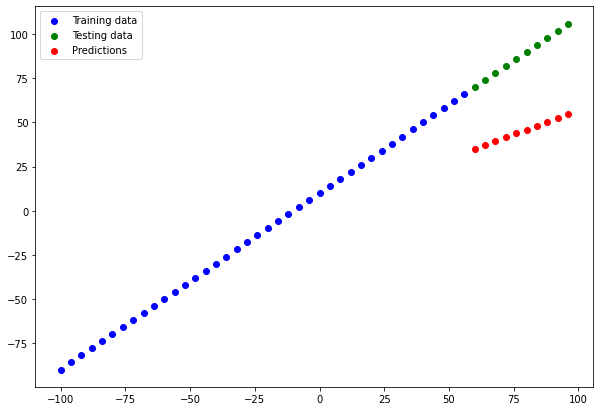

In [159]:
plot_predictions(train_data=X_train,
                 train_labels=y_train,
                 test_data=X_test,
                 test_labels=y_test,
                 predictions=y_preds)

In [160]:
# Evaluate the model on the test set
model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 86ms/step - loss: 43.1482 - mae: 43.1482


[43.14824295043945, 43.14824295043945]

In our case, since we used MAE for the loss function as well as MAE for the metrics, model.evaulate() returns them both.

In [161]:
# Calculate the mean absolute error
mae = tf.metrics.mean_absolute_error(y_true=y_test, 
                                     y_pred=y_preds)
mae

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([53.16786 , 50.941277, 48.7147  , 46.488113, 44.26153 , 42.03495 ,
       39.808372, 37.581787, 35.355206, 33.128624], dtype=float32)>

That's strange, MAE should be a single output.

Instead, we get 10 values.

This is because our y_test and y_preds tensors are different shapes.

In [162]:
# Check the test label tensor values
y_test

array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106])

In [163]:
# Check the predictions tensor values (notice the extra square brackets)
y_preds

array([[34.832138],
       [37.058723],
       [39.2853  ],
       [41.511887],
       [43.73847 ],
       [45.96505 ],
       [48.191628],
       [50.418213],
       [52.644794],
       [54.871376]], dtype=float32)

In [164]:
# Check the tensor shapes
y_test.shape, y_preds.shape

((10,), (10, 1))

We can fix it using squeeze(), it'll remove the the 1 dimension from our y_preds tensor, making it the same shape as y_test.

🔑 Note: If you're comparing two tensors, it's important to make sure they're the right shape(s) (you won't always have to manipulate the shapes, but always be on the look out, many errors are the result of mismatched tensors, especially mismatched input and output shapes).

In [165]:
# Shape before squeeze()
y_preds.shape

(10, 1)

In [166]:
# Shape after squeeze()
y_preds.squeeze().shape

(10,)

In [167]:
# What do they look like?
y_test, y_preds.squeeze()

(array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106]),
 array([34.832138, 37.058723, 39.2853  , 41.511887, 43.73847 , 45.96505 ,
        48.191628, 50.418213, 52.644794, 54.871376], dtype=float32))

In [168]:
# Calcuate the MAE
mae = tf.metrics.mean_absolute_error(y_true=y_test, 
                                     y_pred=y_preds.squeeze()) # use squeeze() to make same shape
mae

<tf.Tensor: shape=(), dtype=float32, numpy=43.148243>

In [169]:
# Calculate the MSE; We use this metric when larger errors are more significant than smaller errors.
mse = tf.metrics.mean_squared_error(y_true=y_test,
                                    y_pred=y_preds.squeeze())
mse

<tf.Tensor: shape=(), dtype=float32, numpy=1887.7172>

We can also calculate the MAE using pure TensorFlow functions.



In [170]:
# Returns the same as tf.metrics.mean_absolute_error()
tf.reduce_mean(tf.abs(y_test-y_preds.squeeze()))

<tf.Tensor: shape=(), dtype=float64, numpy=43.1482421875>

Let's make functions for our evaluation metrics.

In [171]:
def mae(y_test, y_pred):
  """
  Calculuates mean absolute error between y_test and y_preds.
  """
  return tf.metrics.mean_absolute_error(y_test,
                                        y_pred)
  
def mse(y_test, y_pred):
  """
  Calculates mean squared error between y_test and y_preds.
  """
  return tf.metrics.mean_squared_error(y_test,
                                       y_pred)

# Running experiments to improve a model

After seeing the evaluation metrics and the predictions your model makes, it's likely you'll want to improve it.

Again, there are many different ways you can do this, but 3 of the main ones are:

*  Get more data - get more examples for your model to train on (more opportunities to learn patterns).
* Make your model larger (use a more complex model) - this might come in the form of more layers or more hidden units in each layer.
* Train for longer - give your model more of a chance to find the patterns in the data.
Since we created our dataset, we could easily make more data but this isn't always the case when you're working with real-world datasets.

So let's take a look at how we can improve our model using 2 and 3.

To do so, we'll build 3 models and compare their results:

1. model_1 - same as original model, 1 layer, trained for 100 epochs.
2. model_2 - 2 layers, trained for 100 epochs.
3. model_3 - 2 layers, trained for 500 epochs.

#Build `model_1`

In [172]:
# Set random seed
tf.random.set_seed = 42

# Replicate original model
model_1 = tf.keras.Sequential([
  tf.keras.layers.Dense(1)
])

# Compile the model
model_1.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=['mae'])

# Fit the model
model_1.fit(X_train, y_train, epochs=100, verbose=0 )

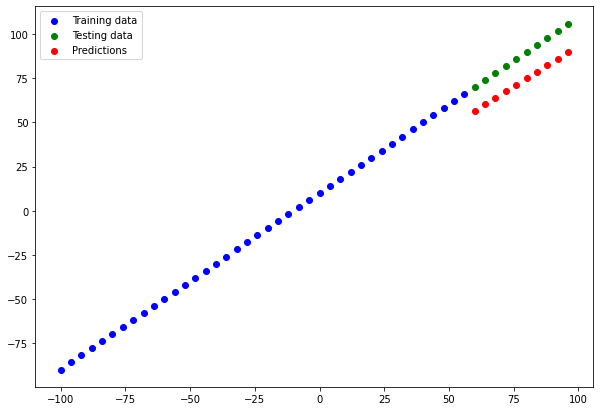

In [173]:
# Make and plot predictions for model_1
y_preds_1 = model_1.predict(X_test)
plot_predictions(predictions=y_preds_1)

In [174]:
# Calculate model_1 metrics
mae_1 = mae(y_test, tf.squeeze(y_preds_1) ).numpy()
mse_1 = mse(y_test, tf.squeeze(y_preds_1) ).numpy()
mae_1, mse_1

(14.861514, 221.68863)

# Build `model_2`

This time we'll add an extra dense layer (so now our model will have 2 layers) whilst keeping everything else *the* same.

In [175]:
# Set random seed
tf.random.set_seed = 42

# Replicate model_1 and add an extra layer
model_2 = tf.keras.Sequential([
  tf.keras.layers.Dense(1),
  tf.keras.layers.Dense(1) # add a second layer
])

# Compile the model
model_2.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=['mae'])

# Fit the model
model_2.fit(X_train, y_train, epochs=100, verbose=0) # set verbose to 0 for less output

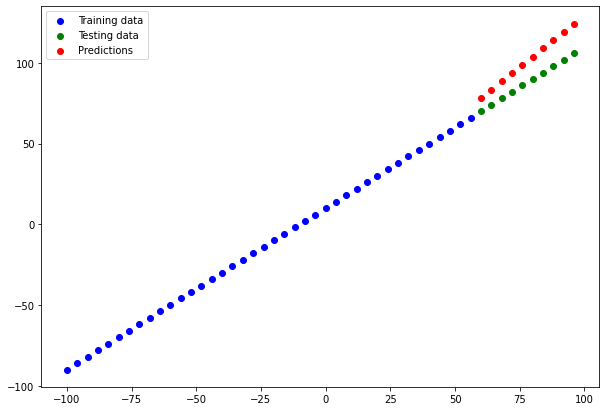

In [176]:
# Make and plot predictions for model_2
y_preds_2 = model_2.predict(X_test)
plot_predictions(predictions=y_preds_2)

In [177]:
# Calculate model_2 metrics
mae_2 = mae(y_test, y_preds_2.squeeze()).numpy()
mse_2 = mse(y_test, y_preds_2.squeeze()).numpy()
mae_2, mse_2

(13.362302, 188.64148)

# Build `model_3`

For our 3rd model, we'll keep everything the same as model_2 except this time we'll train for longer (500 epochs instead of 100).

This will give our model more of a chance to learn the patterns in the data.

In [178]:
# Set random seed
tf.random.set_seed = 42

# Replicate model_2
model_3 = tf.keras.Sequential([
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(1)
])

# Compile the model
model_3.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=['mae'])

# Fit the model (this time for 500 epochs, not 100)
model_3.fit(X_train, y_train, epochs=500, verbose=0) # set verbose to 0 for less output

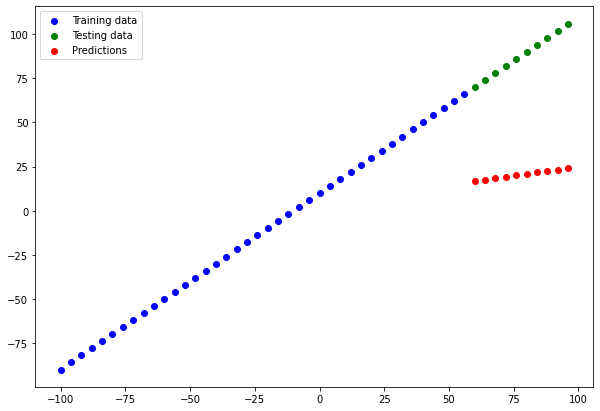

In [179]:
# Make and plot predictions for model_3
y_preds_3 = model_3.predict(X_test)
plot_predictions(predictions=y_preds_3)

In [180]:
# Calculate model_3 metrics
mae_3 = mae(y_test, y_preds_3.squeeze()).numpy()
mse_3 = mse(y_test, y_preds_3.squeeze()).numpy()
mae_3, mse_3

(67.54531, 4646.3687)

# Comparing results


In [181]:
model_results = [["model_1", mae_1, mse_1],
                 ["model_2", mae_2, mse_2],
                 ["model_3", mae_3, mae_3]]

In [182]:
import pandas as pd
all_results = pd.DataFrame(model_results, columns=["model", "mae", "mse"])
all_results

,model,mae,mse
0,model_1,14.861514,221.688629
1,model_2,13.362302,188.641479
2,model_3,67.545311,67.545311


🔑 Note: One of your main goals should be to minimize the time between your experiments. The more experiments you do, the more things you'll figure out which don't work and in turn, get closer to figuring out what does work. Remember the machine learning practitioner's motto: "experiment, experiment, experiment".

# Tracking your experiments

One really good habit to get into is tracking your modelling experiments to see which perform better than others.

We've done a simple version of this above (keeping the results in different variables).

📖 Resource: But as you build more models, you'll want to look into using tools such as:

* TensorBoard - a component of the TensorFlow library to help track modelling experiments (we'll see this later).
* Weights & Biases - a tool for tracking all kinds of machine learning experiments (the good news for Weights & Biases is it plugs into TensorBoard).

# Saving a model
Once you've trained a model and found one which performs to your liking, you'll probably want to save it for use elsewhere (like a web application or mobile device).

You can save a TensorFlow/Keras model using model.save().

There are two ways to save a model in TensorFlow:

* The SavedModel format (default).
* The HDF5 format.
The main difference between the two is the SavedModel is automatically able to save custom objects (such as special layers) without additional modifications when loading the model back in.

Which one should you use?

It depends on your situation but the SavedModel format will suffice most of the time.

Both methods use the same method call.

In [183]:
# Save a model using the SavedModel format....Creates a folder
model_2.save('best_model_SavedModel_format')

INFO:tensorflow:Assets written to: best_model_SavedModel_format/assets


In [184]:
# Check it out - outputs a protobuf binary file (.pb) as well as other files
!ls best_model_SavedModel_format

assets	keras_metadata.pb  saved_model.pb  variables


Now let's save the model in the HDF5 format, we'll use the same method but with a different filename.

In [185]:
# Save a model using the HDF5 format..... Creates a single file 
model_2.save("best_model_HDF5_format.h5") # note the addition of '.h5' on the end

In [186]:
# Check it out
!ls best_model_HDF5_format.h5

best_model_HDF5_format.h5


# Loading a model
We can load a saved model using the load_model() method.

Loading a model for the different formats (SavedModel and HDF5) is the same (as long as the pathnames to the particuluar formats are correct).

In [187]:
# Load a model from the SavedModel format
loaded_saved_model = tf.keras.models.load_model("best_model_SavedModel_format")
loaded_saved_model.summary()

Model: "sequential_25"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_50 (Dense)             (None, 1)                 2         
_________________________________________________________________
dense_51 (Dense)             (None, 1)                 2         
Total params: 4
Trainable params: 4
Non-trainable params: 0
_________________________________________________________________


# Compare model_2 with the SavedModel version (should return True)





In [188]:
# Compare model_2 with the SavedModel version (should return True)
model_2_preds = model_2.predict(X_test)
saved_model_preds = loaded_saved_model.predict(X_test)
mae(y_test, saved_model_preds.squeeze()).numpy() == mae(y_test, model_2_preds.squeeze()).numpy()

True

# Loading in from the HDF5 is much the same.



In [189]:
# Load a model from the HDF5 format
loaded_h5_model = tf.keras.models.load_model("best_model_HDF5_format.h5")
loaded_h5_model.summary()

Model: "sequential_25"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_50 (Dense)             (None, 1)                 2         
_________________________________________________________________
dense_51 (Dense)             (None, 1)                 2         
Total params: 4
Trainable params: 4
Non-trainable params: 0
_________________________________________________________________


# Compare model_2 with the loaded HDF5 version (should return True)

In [190]:
h5_model_preds = loaded_h5_model.predict(X_test)
mae(y_test, h5_model_preds.squeeze()).numpy() == mae(y_test, model_2_preds.squeeze()).numpy()

True

In [191]:
loaded_h5_model.predict(X_test)

array([[ 78.385635],
       [ 83.49156 ],
       [ 88.59749 ],
       [ 93.70341 ],
       [ 98.80934 ],
       [103.91527 ],
       [109.02119 ],
       [114.12712 ],
       [119.23305 ],
       [124.33897 ]], dtype=float32)

In [192]:
loaded_saved_model.predict(X_test)

array([[ 78.385635],
       [ 83.49156 ],
       [ 88.59749 ],
       [ 93.70341 ],
       [ 98.80934 ],
       [103.91527 ],
       [109.02119 ],
       [114.12712 ],
       [119.23305 ],
       [124.33897 ]], dtype=float32)

# Downloading a model (from Google Colab)
Say you wanted to get your model from Google Colab to your local machine, you can do one of the following things:

* Right click on the file in the files pane and click 'download'.
* Use the code below.

In [193]:
# Download the model (or any file) from Google Colab
from google.colab import files
files.download("best_model_HDF5_format.h5")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Save a file from google colab to google drive

we need to mount the google drive in advance by clicking on the third item from left below files.


In [194]:
!cp /content/best_model_HDF5_format.h5 /content/drive/MyDrive/Colab_Notebooks

In [195]:
!ls /content/drive/MyDrive/Colab_Notebooks

 04-representing-data-feature-engineering_trees.ipynb
 06_decision_trees.ipynb
 AnomalyGMM.ipynb
 best_model_HDF5_format.h5
 Classification_SVM_NSE_CASH_INCOMPLETE.ipynb
'Classification Tree Model_mod_Complete.ipynb'
'Class Weights in Decision Trees_mod_Complete.ipynb'
 importing_data.ipynb
 mnist.ipynb
 Projects_Babak
 pyspark.ipynb
 python_dc.ipynb
'Regression Tree_mod_Complete.ipynb'
 Session_02
 Tensor_Flow
 trees.ipynb
 Untitled0.ipynb


# A larger example
Alright, we've seen the fundamentals of building neural network regression models in TensorFlow.

Let's step it up a notch and build a model for a more feature rich datase.

More specifically we're going to try predict the cost of medical insurance for individuals based on a number of different parameters such as, age, sex, bmi, children, smoking_status and residential_region.

To do, we'll leverage the pubically available Medical Cost dataset available from Kaggle and hosted on GitHub.

🔑 Note: When learning machine learning paradigms, you'll often go through a series of foundational techniques and then practice them by working with open-source datasets and examples. Just as we're doing now, learn foundations, put them to work with different problems. Every time you work on something new, it's a good idea to search for something like "problem X example with Python/TensorFlow" where you substitute X for your problem.

In [196]:
# Read in the insurance dataset
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [197]:
# # Turn all categories into numbers
# from sklearn.preprocessing import OneHotEncoder
# cat_encoder = OneHotEncoder()

# insurance_one_hot2 = cat_encoder.fit_transform(insurance)

In [198]:
# Turn all categories into numbers
insurance_one_hot = pd.get_dummies(insurance)
insurance_one_hot.head() # view the converted columns

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


In [199]:
# Create X & y values
X = insurance_one_hot.drop("charges", axis=1)
y = insurance_one_hot["charges"]

In [200]:
# Create training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.2, 
                                                    random_state=42) # set random state for reproducible splits

In [201]:
len(X), len(X_train), len(X_test)

(1338, 1070, 268)

Now we can build and fit a model (we'll make it the same as model_2).

# Create `Model_1`

In [202]:
# Set random seed
tf.random.set_seed = 42

# Create a new model (same as model_2)
insurance_model = tf.keras.Sequential([
  tf.keras.layers.Dense(1),
  tf.keras.layers.Dense(1)
])

# Compile the model
insurance_model.compile(loss=tf.keras.losses.mae,
                        optimizer=tf.keras.optimizers.SGD(),
                        metrics=['mae'])

# Fit the model
insurance_model.fit(X_train, y_train, epochs=100, verbose=0)

# Evaluate `Model_1`

In [203]:
# Check the results of the insurance model on test data
insurance_model.evaluate(X_test, y_test)

9/9 [==============================] - 0s 1ms/step - loss: 7403.7749 - mae: 7403.7749


[7403.77490234375, 7403.77490234375]

In [204]:
y_train.mean(), y_train.median()

(13346.089736364489, 9575.4421)


**MAE is large compare to Median and Mean!**



Our model didn't perform very well, let's try a bigger model.

We'll try 3 things:

1. Increasing the number of layers (2 -> 3).
2. Increasing the number of units in each layer (except for the output layer).
3. Changing the optimizer (from SGD to Adam).

Everything else will stay the same.

# Create `Model_2`

In [205]:
# Set random seed
tf.random.set_seed = 42

# 1- Creat a model
insurance_model_2 = tf.keras.Sequential([
                                        tf.keras.layers.Dense(100),
                                        tf.keras.layers.Dense(10),
                                        tf.keras.layers.Dense(1)]
)


# 2- Compile the model
insurance_model_2.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.Adam(),
                          metrics=['mae']
)

# 3- Fit the model
insurance_model_2.fit(X_train, y_train, epochs=100, verbose=0)


# Evaluate `Model_2`

In [206]:
insurance_model_2.evaluate(X_test, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 4772.7935 - mae: 4772.7935


[4772.79345703125, 4772.79345703125]

# Create `Model_3`

In [207]:
# Set random seed
tf.random.set_seed = 42

# 1- Creat a model
insurance_model_3 = tf.keras.Sequential([
                                        tf.keras.layers.Dense(100),
                                        tf.keras.layers.Dense(10),
                                        tf.keras.layers.Dense(1)]
)


# 2- Compile the model
insurance_model_3.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.Adam(),
                          metrics=['mae']
)

# 3- Fit the model
history = insurance_model_3.fit(X_train, y_train, epochs=200, verbose=0)


# Evaluate `Model_3`

In [208]:
insurance_model_3.evaluate(X_test, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 3482.7080 - mae: 3482.7080


[3482.7080078125, 3482.7080078125]

🔑 Note: For many problems, the Adam optimizer is a great starting choice. See Andrei Karpathy's "Adam is safe" point from A Recipe for Training Neural Networks for more.

In [209]:
pd.DataFrame(history.history)

,loss,mae
0,13284.663086,13284.663086
1,13091.648438,13091.648438
2,12689.254883,12689.254883
3,11907.687500,11907.687500
4,10656.222656,10656.222656
...,...,...
195,3677.155518,3677.155518
196,3662.770752,3662.770752
197,3667.878418,3667.878418
198,3676.905029,3676.905029


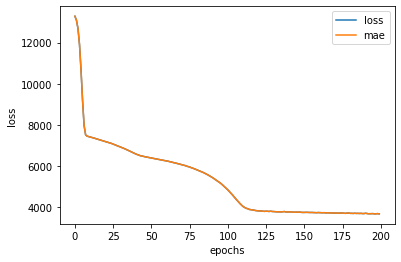

In [210]:
# Plot history (also known as a loss curve)
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs");

From this, it looks like our model's loss (and MAE) were both still decreasing (in our case, MAE and loss are the same, hence the lines in the plot overlap eachother).

What this tells us is the loss might go down if we try training it for longer.

🤔 Question: How long should you train for?

It depends on what problem you're working on. Sometimes training won't take very long, other times it'll take longer than you expect. A common method is to set your model training for a very long time (e.g. 1000's of epochs) but set it up with an EarlyStopping callback so it stops automatically when it stops improving. We'll see this in another module.

# Let's train the same model as above for a little longer. We can do this but calling fit on it again.



In [211]:
# Try training for a little longer (100 more epochs)
history_2 = insurance_model_2.fit(X_train, y_train, epochs=100, verbose=0)

How did the extra training go?



In [212]:
# Evaluate the model trained for 200 total epochs
insurance_model_2_loss, insurance_model_2_mae = insurance_model_2.evaluate(X_test, y_test)
insurance_model_2_loss, insurance_model_2_mae

9/9 [==============================] - 0s 1ms/step - loss: 3491.2249 - mae: 3491.2249


(3491.224853515625, 3491.224853515625)

Boom! Training for an extra 100 epochs we see about a 10% decrease in error.

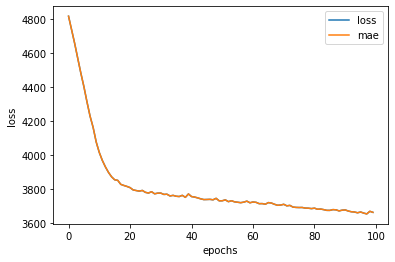

In [213]:
# Plot the model trained for 200 total epochs loss curves
pd.DataFrame(history_2.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs"); # note: epochs will only show 100 since we overrid the history variable

In [214]:
history_2_n = insurance_model_2.fit(X_train, y_train, epochs=100)

Epoch 1/100
34/34 [==============================] - 0s 1ms/step - loss: 3654.5647 - mae: 3654.5647
Epoch 2/100
34/34 [==============================] - 0s 2ms/step - loss: 3648.3059 - mae: 3648.3059
Epoch 3/100
34/34 [==============================] - 0s 1ms/step - loss: 3650.5396 - mae: 3650.5396
Epoch 4/100
34/34 [==============================] - 0s 1ms/step - loss: 3651.1689 - mae: 3651.1689
Epoch 5/100
34/34 [==============================] - 0s 1ms/step - loss: 3646.7073 - mae: 3646.7073
Epoch 6/100
34/34 [==============================] - 0s 1ms/step - loss: 3657.1179 - mae: 3657.1179
Epoch 7/100
34/34 [==============================] - 0s 1ms/step - loss: 3648.7822 - mae: 3648.7822
Epoch 8/100
34/34 [==============================] - 0s 1ms/step - loss: 3643.9797 - mae: 3643.9797
Epoch 9/100
34/34 [==============================] - 0s 1ms/step - loss: 3641.5681 - mae: 3641.5681
Epoch 10/100
34/34 [==============================] - 0s 1ms/step - loss: 3650.9390 - mae: 3650.9390

In [215]:
insurance_model_2_loss, insurance_model_2_mae = insurance_model_2.evaluate(X_test, y_test)
insurance_model_2_loss, insurance_model_2_mae

9/9 [==============================] - 0s 1ms/step - loss: 3209.0681 - mae: 3209.0681


(3209.068115234375, 3209.068115234375)

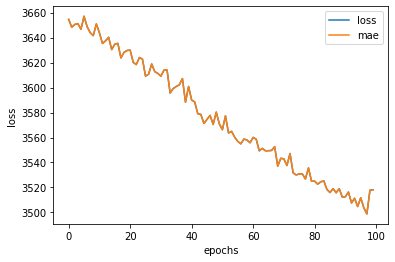

In [216]:
#  Plot the model trained for 200 total epochs loss curves
pd.DataFrame(history_2_n.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs"); # note: epochs will only show 100 since we overrid the history variable

Preprocessing data (normalization and standardization)
A common practice when working with neural networks is to make sure all of the data you pass to them is in the range 0 to 1.

1.  This practice is called normalization (scaling all values from their original range to, e.g. between 0 and 100,000 to be between 0 and 1).

2. There is another process call standardization which converts all of your data to unit variance and 0 mean.

These two practices are often part of a preprocessing pipeline (a series of functions to prepare your data for use with neural networks).

Knowing this, some of the major steps you'll take to preprocess your data for a neural network include:

* Turning all of your data to numbers (a neural network can't handle strings).
* Making sure your data is in the right shape (verifying input and output shapes).
* Feature scaling:
 * Normalizing data (Or **scaling**: making sure all values are between 0 and 1). This is done by subtracting the minimum value then dividing by the maximum value minus the minmum. This is also referred to as min-max scaling.**It preserves the original distribution.**
 *  Standardization (making sure all values have a mean of 0 and a variance of 1). This is done by substracting the mean value from the target feature and then dividing it by the standard deviation. I**t reduces the effects of outliers.**
 * Which one should you use?
**With neural networks you'll tend to favour normalization as they tend to prefer values between 0 and 1 (you'll see this espcially with image processing)**, however, you'll often find a neural network can perform pretty well with minimal feature scaling.

📖 Resource: For more on preprocessing data, I'd recommend reading the following resources:

Scikit-Learn's documentation on preprocessing data.
Scale, Standardize or Normalize with Scikit-Learn by Jeff Hale.
We've already turned our data into numbers using get_dummies(), let's see how we'd normalize it as well.

Now, just as before, we need to transform the non-numerical columns into numbers and this time we'll also be normalizing the numerical columns with different ranges (to make sure they're all between 0 and 1).

To do this, we're going to use a few classes from Scikit-Learn:

* make_column_transformer - build a multi-step data preprocessing function for the folllowing trnasformations:
* MinMaxScaler - make sure all numerical columns are normalized (between 0 and 1).
* OneHotEncoder - one hot encode the non-numerical columns.
Let's see them in action.

In [217]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

# Create column transformer (this will help us normalize/preprocess our data)
ct = make_column_transformer(
    (MinMaxScaler(), ["age", "bmi", "children"]), # get all values between 0 and 1
    (OneHotEncoder(handle_unknown="ignore"), ["sex", "smoker", "region"])
)

# Create X & y
X = insurance.drop("charges", axis=1)
y = insurance["charges"]

# Build our train and test sets (use random state to ensure same split as before)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Fit column transformer on the training data only (doing so on test data would result in data leakage)
# ct.fit(X_train)

# Fit and Transform training and test data with normalization (MinMaxScalar) and one hot encoding (OneHotEncoder)
X_train_normal = ct.fit_transform(X_train)
X_test_normal = ct.fit_transform(X_test)

In [218]:
# Non-normalized and non-one-hot encoded data example
X_train.loc[0]

age                19
sex            female
bmi              27.9
children            0
smoker            yes
region      southwest
Name: 0, dtype: object

In [219]:
# Normalized and one-hot encoded example
X_train_normal[3]

array([0.45652174, 0.49394673, 1.        , 1.        , 0.        ,
       1.        , 0.        , 0.        , 0.        , 1.        ,
       0.        ])

In [220]:
X_train_normal.shape # Same as panda dummy 

(1070, 11)

In [221]:
X_train_normal[:,0]

array([0.60869565, 0.63043478, 0.73913043, ..., 0.86956522, 0.41304348,
       0.80434783])

# Create `Model_4`

In [222]:
# Set random seed
tf.random.set_seed = 42

# Build the model (3 layers, 100, 10, 1 units)
insurance_model_4 = tf.keras.Sequential([                                                                                  
                                          tf.keras.layers.Dense(100),
                                          tf.keras.layers.Dense(10),
                                          tf.keras.layers.Dense(1)
])

# Compile the model
insurance_model_4.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.Adam(),
                          metrics=['mae'])

# Fit the model for 200 epochs (same as insurance_model_2)
insurance_model_4.fit(X_train_normal, y_train, epochs=200, verbose=0)

# Evaluate `Model_4`

In [223]:
insurance_model_4.evaluate(X_test_normal, y_test)

9/9 [==============================] - 0s 1ms/step - loss: 3170.2200 - mae: 3170.2200


[3170.219970703125, 3170.219970703125]